In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Attention : dans les données de prévisions 2023 il manque 5 valeurs au 31 décembre 2023 il manque les valeurs de 7h à midi. Ainsi on retire les même valeurs des relevés pour pouvoir faire de bonnes comparaisons.

bonjour test

In [2]:
Paris_historical_data = pd.read_csv('hourly_dataframe_historical_data_Paris.csv')
Paris_past_forecast = pd.read_csv('hourly_dataframe_past_forecast_Paris.csv')

print(Paris_historical_data)
print(Paris_past_forecast)

      Unnamed: 0                       date  temperature_2m
0              0  2023-01-01 00:00:00+00:00       15.064501
1              1  2023-01-01 01:00:00+00:00       15.164500
2              2  2023-01-01 02:00:00+00:00       14.964500
3              3  2023-01-01 03:00:00+00:00       14.414500
4              4  2023-01-01 04:00:00+00:00       14.364500
...          ...                        ...             ...
8755        8755  2023-12-31 19:00:00+00:00        8.264501
8756        8756  2023-12-31 20:00:00+00:00        7.914500
8757        8757  2023-12-31 21:00:00+00:00        7.614500
8758        8758  2023-12-31 22:00:00+00:00        7.564500
8759        8759  2023-12-31 23:00:00+00:00        7.464500

[8760 rows x 3 columns]
      Unnamed: 0                       date  temperature_2m
0              0  2023-01-01 00:00:00+00:00       15.938999
1              1  2023-01-01 01:00:00+00:00       15.188999
2              2  2023-01-01 02:00:00+00:00       14.839000
3              

In [3]:
j=0
for i in range(len(Paris_past_forecast)):
    if Paris_past_forecast["date"].iloc[i] != Paris_historical_data["date"].iloc[i]:
        print(i)
        j+=1
        if j==5:
            print(i)
            break
        
        

8743
8744
8745
8746
8747
8747


In [4]:
Paris_historical_data.drop([8743,8744,8745,8746,8747])


,Unnamed: 0,date,temperature_2m
0,0,2023-01-01 00:00:00+00:00,15.064501
1,1,2023-01-01 01:00:00+00:00,15.164500
2,2,2023-01-01 02:00:00+00:00,14.964500
3,3,2023-01-01 03:00:00+00:00,14.414500
4,4,2023-01-01 04:00:00+00:00,14.364500
...,...,...,...
8755,8755,2023-12-31 19:00:00+00:00,8.264501
8756,8756,2023-12-31 20:00:00+00:00,7.914500
8757,8757,2023-12-31 21:00:00+00:00,7.614500
8758,8758,2023-12-31 22:00:00+00:00,7.564500


In [5]:
Paris_historical_data.reset_index(drop=True)
print(len(Paris_historical_data))

8760


In [6]:
Paris_past_forecast["real temperature 2m"]=Paris_historical_data["temperature_2m"]
Paris_past_forecast["error"]=Paris_past_forecast["temperature_2m"]-Paris_past_forecast["real temperature 2m"]
Paris_past_forecast["abs_value"]=abs(Paris_past_forecast["error"])
print(Paris_past_forecast)

      Unnamed: 0                       date  temperature_2m  \
0              0  2023-01-01 00:00:00+00:00       15.938999   
1              1  2023-01-01 01:00:00+00:00       15.188999   
2              2  2023-01-01 02:00:00+00:00       14.839000   
3              3  2023-01-01 03:00:00+00:00       14.438999   
4              4  2023-01-01 04:00:00+00:00       13.988999   
...          ...                        ...             ...   
8750        8755  2023-12-31 19:00:00+00:00        8.011000   
8751        8756  2023-12-31 20:00:00+00:00        7.511000   
8752        8757  2023-12-31 21:00:00+00:00        7.411000   
8753        8758  2023-12-31 22:00:00+00:00        7.661000   
8754        8759  2023-12-31 23:00:00+00:00        7.561000   

      real temperature 2m     error  abs_value  
0               15.064501  0.874498   0.874498  
1               15.164500  0.024499   0.024499  
2               14.964500 -0.125500   0.125500  
3               14.414500  0.024499   0.024499 

In [7]:
Paris_past_forecast['date'] = pd.to_datetime(Paris_past_forecast['date'])


In [8]:
print(Paris_past_forecast["abs_value"].mean())
Paris_past_forecast.describe()

1.440001432442947


,Unnamed: 0,temperature_2m,real temperature 2m,error,abs_value
count,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000
mean,4377.006853,14.356308,13.129840,1.226468,1.440001
std,2527.506998,7.095172,7.039941,1.335348,1.101684
min,0.000000,-2.611000,-5.035500,-7.225500,0.024499
25%,2188.500000,9.438999,8.314501,0.424500,0.624499
50%,4377.000000,13.589000,12.414500,1.124500,1.224499
75%,6565.500000,19.689000,18.314500,1.924500,1.974500
max,8759.000000,34.789000,33.914500,6.774499,7.225500


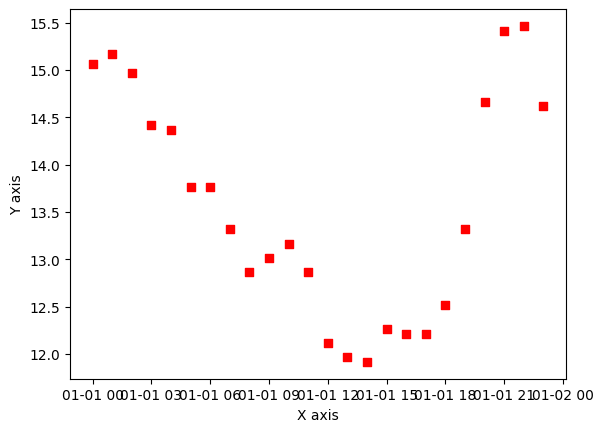

In [9]:
x = Paris_past_forecast["date"].head(24)
y1 = Paris_past_forecast["real temperature 2m"].head(24)


fig = plt.figure()

# Scatter plot the points
plt.scatter(x, y1, c='r', marker=',')


# Set labels
plt.xlabel('X axis')
plt.ylabel('Y axis')


plt.show()

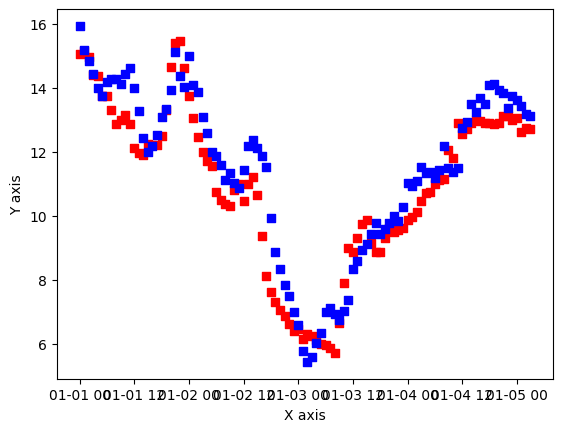

In [10]:
x = Paris_past_forecast["date"].head(100)
y1 = Paris_past_forecast["real temperature 2m"].head(100)
y2 = Paris_past_forecast["temperature_2m"].head(100)

fig = plt.figure()

# Scatter plot the points
plt.scatter(x, y1, c='r', marker=',')
plt.scatter(x, y2, c='b', marker=',')

# Set labels
plt.xlabel('X axis')
plt.ylabel('Y axis')


plt.show()